# ETS Decomposition

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
airline = pd.read_csv('D:/Data Science Course/Projects/Python/Datasets/AirPassengers.csv', index_col=0, parse_dates= True)
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
airline.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [4]:
airline=  airline.rename(columns={'#Passengers': 'Passengers'})

In [5]:
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

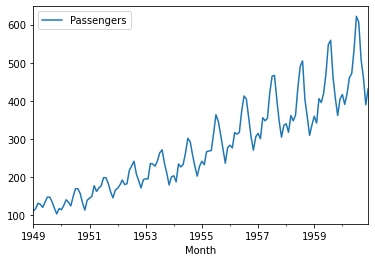

In [6]:
airline[['Passengers']].plot()

Based on the chart, it looks like the trend in the earlier days is increasing at highr rate tham just linear (although it is a bit hard to tell from this one plot)

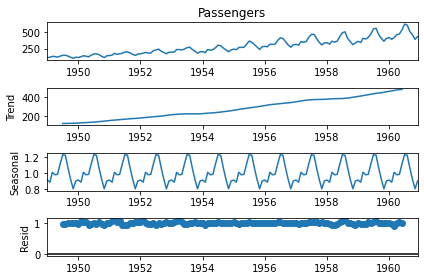

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline['Passengers'], model='multiplicative') #model = 'mul' would also work
result.plot();

# First Order Differencing

Non-Stationary data can be made to look like a stationary data through differencing. A simple method called first order differencing calculates the difference between consecutive observations

y'(t) = y(t) - y(t-1)

In this way a linear trend is transformed into a horizontal set of values

In [8]:
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
# Calculate the first order difference of the non-stationary dataset 'Passengers'
airline['shift'] = airline['Passengers'] - airline['Passengers'].shift(1)

In [10]:
airline[['Passengers', 'shift']].head()

,Passengers,shift
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


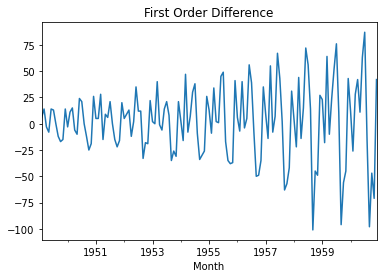

In [11]:
airline['shift'].plot(title='First Order Difference').autoscale(axis='x', tight=True);

In [12]:
airline['12-mon-SMA'] = airline['shift'].rolling(window=12).mean()
airline['12-mon-Std'] = airline['shift'].rolling(window=12).std()

<AxesSubplot:xlabel='Month'>

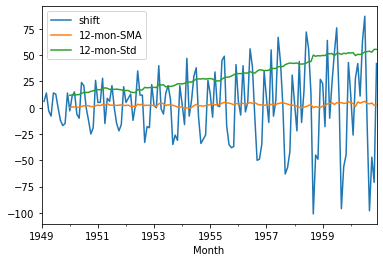

In [13]:
airline[['shift', '12-mon-SMA', '12-mon-Std']].plot()

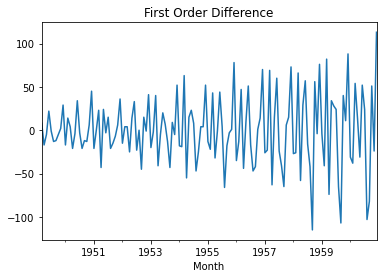

In [14]:
airline['shift'] = airline['shift'].diff()
airline['shift'].plot(title ='First Order Difference').autoscale(axis ='x', tight = True) 